# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [37]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
open('image_predictions.tsv', 'wb').write(response.content)

335079

In [38]:
df2 = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [39]:
import tweepy
import time
import json

In [40]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
open('tweet-json.txt', 'wb').write(response.content)

10609234

In [41]:
# The following code turns the tweet-json.txt file provided by Udacity into a dataframe
selected_attr = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                              'favorites': json_data['favorite_count'],
                              'retweets': json_data['retweet_count'],
                              'timestamp': json_data['created_at']
        })

tweet_selected_attr = pd.DataFrame(selected_attr, columns=['tweet_id', 'favorites', 'retweets', 'timestamp'])

## Data assesing

In [42]:
# Visual assessment
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [43]:
# Visual assessment
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [44]:
# Visual assessment
tweet_selected_attr.head()

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017


In [45]:
# Programmatic assessment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [46]:
#Programmatic assessment
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [47]:
#Programmatic assessment

tweet_selected_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
timestamp    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [48]:
df.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
87,875144289856114688,NaN,NaN,2017-06-15 00:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Nugget and Hank. Nugget took Hank's bone....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875144289...,13,10,Nugget,None,None,None,None
1238,712097430750289920,NaN,NaN,2016-03-22 02:03:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't even comprehend how confused this dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712097430...,10,10,None,None,None,None,None
668,790277117346975746,NaN,NaN,2016-10-23 19:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He never backs down from a chal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790277117...,11,10,Bruce,None,None,None,None
341,832215726631055365,NaN,NaN,2017-02-16 13:11:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932865e+17,4.196984e+09,2016-11-01 03:00:09 +0000,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
1021,746726898085036033,NaN,NaN,2016-06-25 15:29:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Abby. She's incredibly distracting. Just ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746726898...,12,10,Abby,None,None,None,None
2131,670086499208155136,NaN,NaN,2015-11-27 03:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hi yes this is dog. I can't help with that s-...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670086499...,10,10,None,None,None,None,None
803,772152991789019136,NaN,NaN,2016-09-03 19:23:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a couple rufferees making sure all the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772152991...,10,10,None,None,None,None,None
63,879862464715927552,NaN,NaN,2017-06-28 00:42:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Romeo. He would like to do an entrance...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879862464...,13,10,Romeo,None,None,None,None
2157,669583744538451968,NaN,NaN,2015-11-25 18:29:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Special dog here. Pretty big. Neck kinda long ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669583744...,6,10,None,None,None,None,None
2232,668221241640230912,NaN,NaN,2015-11-22 00:15:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two dogs are Bo &amp; Smittens. Smittens...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668221241...,10,10,None,None,None,None,None


In [49]:
# Visual assessment

df2.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
296,671362598324076544,https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg,1,tub,0.393616,False,bathtub,3.835220e-01,False,swimming_trunks,7.730080e-02,False
1923,857029823797047296,https://pbs.twimg.com/media/C-TIEwMW0AEjb55.jpg,2,golden_retriever,0.968623,True,Labrador_retriever,1.032520e-02,True,Saluki,4.148420e-03,True
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador_retriever,0.213673,True,beagle,1.462350e-01,True,Airedale,1.227010e-01,True
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
329,672082170312290304,https://pbs.twimg.com/media/CVO3KodXAAAj1de.jpg,1,hamster,0.132440,False,toy_poodle,1.239620e-01,True,bubble,5.621240e-02,False
620,680473011644985345,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,1,Lakeland_terrier,0.796694,True,West_Highland_white_terrier,1.387090e-01,True,Norwich_terrier,1.625340e-02,True
1552,793150605191548928,https://pbs.twimg.com/media/CwHWOZ7W8AAHv8S.jpg,1,Italian_greyhound,0.193869,True,bluetick,1.603800e-01,True,standard_poodle,1.259820e-01,True
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,1.186510e-01,False,ski_mask,9.248170e-02,False
1866,843604394117681152,https://pbs.twimg.com/media/C7UVuE_U0AI8GGl.jpg,1,Labrador_retriever,0.430583,True,golden_retriever,2.635810e-01,True,Great_Pyrenees,1.793850e-01,True
681,683828599284170753,https://pbs.twimg.com/media/CX1ye7HUMAADDzh.jpg,1,malamute,0.577376,True,Siberian_husky,2.871310e-01,True,Eskimo_dog,1.175630e-01,True


In [50]:
# Visual assessment

tweet_selected_attr.sample(25)

,tweet_id,favorites,retweets,timestamp
1706,680798457301471234,3134,1182,Sat Dec 26 17:12:55 +0000 2015
857,763183847194451968,6004,1702,Wed Aug 10 01:23:03 +0000 2016
737,780800785462489090,6141,1505,Tue Sep 27 16:06:28 +0000 2016
2081,670811965569282048,1202,295,Sun Nov 29 03:50:10 +0000 2015
678,789137962068021249,10875,3244,Thu Oct 20 16:15:26 +0000 2016
1070,739979191639244800,21898,6719,Tue Jun 07 00:36:02 +0000 2016
1080,738883359779196928,3661,917,Sat Jun 04 00:01:35 +0000 2016
1809,676819651066732545,1957,741,Tue Dec 15 17:42:34 +0000 2015
1856,675501075957489664,18482,6485,Sat Dec 12 02:23:01 +0000 2015
259,842892208864923648,0,56625,Sat Mar 18 00:15:37 +0000 2017


In [51]:
#Programmatic assessment. Searching for duplicates.

df.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [52]:
#Programmatic assessment. Searching for duplicates.

tweet_selected_attr.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
720775346191278080    1
879492040517615616    1
785927819176054784    1
834209720923721728    1
857062103051644929    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
678800283649069056    1
6815798356684554

In [53]:
#Programmatic assessment. Searching for duplicates.

df2.tweet_id.value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [54]:
#Programmatic assessment

df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [55]:
#Programmatic assessment

df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [56]:
#Programmatic assessment

df.query('rating_denominator != 10 and (rating_numerator < 10 or rating_numerator > 20)')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None


In [57]:
#Programmatic assessment

df.query('in_reply_to_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [58]:
#Programmatic assessment

df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Lola           10
Tucker         10
Penny          10
Bo              9
Winston         9
the             8
Sadie           8
Daisy           7
Toby            7
Bailey          7
an              7
Buddy           7
Bella           6
Rusty           6
Koda            6
Milo            6
Stanley         6
Jax             6
Leo             6
Oscar           6
Dave            6
Jack            6
Scout           6
Oakley          5
             ... 
Kellogg         1
Severus         1
Zooey           1
Monster         1
Ed              1
Pip             1
Dook            1
Bode            1
Batdog          1
Winifred        1
Rinna           1
Ember           1
Rhino           1
Raphael         1
Ace             1
Crawford        1
Tessa           1
Ferg            1
Karl            1
Trevith         1
Pilot           1
Pherb           1
Longfellow      1
Ralphé          1
Amélie    

In [59]:
df[~df["text"].str.contains('http')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
171,858860390427611136,NaN,NaN,2017-05-01 01:47:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Winston. He knows he's a l...,8.395493e+17,4.196984e+09,2017-03-08 18:52:12 +0000,https://twitter.com/dog_rates/status/839549326...,12,10,Winston,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
182,856602993587888130,NaN,NaN,2017-04-24 20:17:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Luna. It's her first ti...,8.447048e+17,4.196984e+09,2017-03-23 00:18:10 +0000,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None


### Quality issues

1. Nulls wrongly represented: In twitter-archive-enhanced.csv, in the columns doggo, floofer, pupper, puppo and name there are rows that have the value "None", but are not null, when they should be null.

2. In the columns that make reference to dog "stage", the data type should be category, instead of object.

3. We are only looking for original ratings and there are tweets that are retweets that shouldn't be considered. 

4. In twitter-archive-enhanced.csv, in the column "name", there are names that are wrong like "a", "the" or "an".

5. In twitter-archive-enhanced.csv, in the column "timestamp", the data type should be date time.

6. "This is an Albanian 3 1/2 legged  Episcopalian." In this case, "1" was wrongly extracted as the rating for the numerator and "2" was wrongly extracted as the rating for the denominator.

7. We are looking for ratings with images and some ratings don't have urls with images in the text column.

8. Timestamp is duplicated (Present in twitter-archive-enhanced.csv and tweet-json.txt)

### Tidiness issues

1. The 3 tables should be joined in 1 table, using the tweet id.

2. The four columns doggo, floofer, pupper and puppo, should be joined into 1.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [60]:
# Make copies of original pieces of data before cleaning
df_copy = df.copy()
df2_copy = df2.copy()
tweet_selected_attr_copy = tweet_selected_attr.copy()

### Tidiness issues

### Issue 1:

### Define: Join the 3 tables into 1 table, using the tweet_id and a left join.

### Code

In [61]:
# Change the tweet_id to a string, so that the tables can be succesfully merged.
df_copy.tweet_id = df_copy.tweet_id.astype('str')
df2_copy.tweet_id = df2_copy.tweet_id.astype('str')
tweet_selected_attr_copy.tweet_id = tweet_selected_attr_copy.tweet_id.astype('str')

In [62]:
# Check tweet_id is a string.

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [63]:
master_df = pd.merge(pd.merge(df_copy,df2_copy,on='tweet_id', how='left'),tweet_selected_attr_copy,on='tweet_id', how='left')

In [64]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,timestamp_y
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,Sat Jul 29 16:00:24 +0000 2017


### In the cells below im also solving and testing, for the quality issue number 8 (timestamp is duplicated). timestamp_y is removed and then we test if it was succesfully removed.

In [65]:
master_df.drop('timestamp_y', inplace=True, axis=1)

In [66]:
master_df.rename(columns = {'timestamp_x':'timestamp'}, inplace = True)

In [67]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0


### Test

In [68]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       2

### Issue 2

### Define: Join the dog stage columns into one column

### Code

In [70]:
master_df = pd.melt(master_df, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog', 'favorites', 'retweets'],
                           var_name='dog_stage', value_name='dog_stage_value')

In [71]:
master_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage,dog_stage_value
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,doggo,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562.0,3261.0,doggo,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Border_collie,0.199287,True,ice_lolly,0.193548,False,12041.0,2158.0,doggo,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848.0,16716.0,doggo,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226.0,4429.0,doggo,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467.0,7711.0,doggo,doggo


In [72]:
master_df.drop('dog_stage', inplace=True, axis=1)

In [73]:
master_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage_value
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562.0,3261.0,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,12041.0,2158.0,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848.0,16716.0,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226.0,4429.0,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467.0,7711.0,doggo


In [74]:
master_df = master_df.sort_values(by=['dog_stage_value'], ascending=False)

In [75]:
master_df.head(150)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage_value
8029,751132876104687617,NaN,NaN,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,...,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True,5610.0,1480.0,puppo
7463,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,...,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True,56413.0,19669.0,puppo
8151,738537504001953792,NaN,NaN,2016-06-03 01:07:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738537504...,...,True,gibbon,0.028942,False,Pembroke,0.026498,True,5575.0,1759.0,puppo
7507,819952236453363712,NaN,NaN,2017-01-13 17:00:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He has dreams of being a servi...,NaN,NaN,NaN,"https://www.gofundme.com/servicedogoliver,http...",...,True,Staffordshire_bullterrier,0.036221,True,Italian_greyhound,0.020412,True,5927.0,1369.0,puppo
7506,820013781606658049,NaN,NaN,2017-01-13 21:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oliver. He has dreams o...,8.199522e+17,4.196984e+09,2017-01-13 17:00:21 +0000,"https://www.gofundme.com/servicedogoliver,http...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1369.0,puppo
7769,786051337297522688,7.727430e+17,7.305050e+17,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1614.0,179.0,puppo
7711,793195938047070209,NaN,NaN,2016-10-31 21:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793195938...,...,True,golden_retriever,0.074100,True,Chihuahua,0.042339,True,17063.0,6547.0,puppo
8116,743253157753532416,NaN,NaN,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743253157...,...,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,4624.0,1366.0,puppo
7481,822872901745569793,NaN,NaN,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901...,...,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,132810.0,48265.0,puppo
8103,744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,...,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,3277.0,716.0,puppo


In [76]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 8029 to 9423
Data columns (total 27 columns):
tweet_id                      9424 non-null object
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     9424 non-null object
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          9424 non-null object
jpg_url                       8300 non-null object
img_num                       8300 non-null float64
p1                            8300 non-null object
p1_conf                       8300 non-null float64
p1_dog                  

In [77]:
master_df = master_df.drop_duplicates(subset='tweet_id', keep='first')

### Test

In [78]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 8029 to 7121
Data columns (total 27 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                    

In [79]:
master_df.head(1000)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage_value
8029,751132876104687617,NaN,NaN,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,...,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True,5610.0,1480.0,puppo
7463,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,...,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True,56413.0,19669.0,puppo
8151,738537504001953792,NaN,NaN,2016-06-03 01:07:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738537504...,...,True,gibbon,0.028942,False,Pembroke,0.026498,True,5575.0,1759.0,puppo
7507,819952236453363712,NaN,NaN,2017-01-13 17:00:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He has dreams of being a servi...,NaN,NaN,NaN,"https://www.gofundme.com/servicedogoliver,http...",...,True,Staffordshire_bullterrier,0.036221,True,Italian_greyhound,0.020412,True,5927.0,1369.0,puppo
7506,820013781606658049,NaN,NaN,2017-01-13 21:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oliver. He has dreams o...,8.199522e+17,4.196984e+09,2017-01-13 17:00:21 +0000,"https://www.gofundme.com/servicedogoliver,http...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1369.0,puppo
7769,786051337297522688,7.727430e+17,7.305050e+17,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1614.0,179.0,puppo
7711,793195938047070209,NaN,NaN,2016-10-31 21:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793195938...,...,True,golden_retriever,0.074100,True,Chihuahua,0.042339,True,17063.0,6547.0,puppo
8116,743253157753532416,NaN,NaN,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743253157...,...,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,4624.0,1366.0,puppo
7481,822872901745569793,NaN,NaN,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901...,...,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,132810.0,48265.0,puppo
8103,744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,...,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,3277.0,716.0,puppo


## Quality issues

### Issue 1

### Define: Change the values in the new column dog_stage_value that have the value "None" to nulls.

### Code

In [80]:
master_df['dog_stage_value'] = master_df['dog_stage_value'].replace('None', np.nan)

### Test

In [81]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 8029 to 7121
Data columns (total 27 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                    

### Issue 2

### Define: Change the data type in dog_stage_value from object to category

### Code

In [82]:
master_df.dog_stage_value = master_df.dog_stage_value.astype('category')

### Test

In [83]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 8029 to 7121
Data columns (total 27 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                    

### Issue 3

### Define: Remove from the dataframe the values that are retweets

### Code

In [84]:
#remove retweets
master_df = master_df[master_df['retweeted_status_id'].isnull()]

### Test

In [85]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 8029 to 7121
Data columns (total 27 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 non-null object
p1_conf                       1994 non-null float64
p1_dog                        19

### Issue 4

### Define: Remove values in the column name that are wrong like 'a', 'the' and 'an'.

### Code

In [86]:
#remove names that are wrong
master_df['name'] = master_df['name'].replace('a', np.nan)
master_df['name'] = master_df['name'].replace('the', np.nan)
master_df['name'] = master_df['name'].replace('an', np.nan)

### Test

In [87]:
master_df.name.value_counts()

None        680
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Lola          8
Sadie         8
Winston       8
Daisy         7
Toby          7
Jax           6
Koda          6
Oscar         6
Bo            6
Stanley       6
Bella         6
Bailey        6
Scout         5
Rusty         5
Leo           5
Bentley       5
Dave          5
Milo          5
Louis         5
Chester       5
Buddy         5
Jack          4
Jeffrey       4
           ... 
Rodney        1
Lucky         1
Jim           1
Monty         1
Linus         1
Goose         1
Bobb          1
Freddery      1
Buckley       1
Mingus        1
Asher         1
Toffee        1
Remy          1
Lulu          1
Samsom        1
Liam          1
Torque        1
Pumpkin       1
Ferg          1
Bode          1
Rinna         1
Ember         1
Rhino         1
Raphael       1
Mookie        1
Ralpher       1
Crawford      1
Rumpole       1
Tessa         1
Cupid         1
Name: name, Length: 953,

### Issue 5

### Define: Change the datatype of the timestamp column to date

### Code

In [88]:
master_df.timestamp = pd.to_datetime(master_df.timestamp)

### Test

In [89]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 8029 to 7121
Data columns (total 27 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2106 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 non-null object
p1_conf                       1994 non-null float64
p1_dog                  

### Issue 6

### Define: Change the numerator and denominator values to the correct values, so that the rating changes from 1/2, to 9/10 , for the Albanian 3 1/2 legged  Episcopalian

In [90]:
### Below is the text that shows how rating is 9/10, rather than 1/2.

In [91]:
### This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv

### Code

In [92]:
master_df[master_df['text'].str.contains("This is an Albanian 3 1/2 legged  Episcopalian.")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,dog_stage_value
7047,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,...,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,152.0,71.0,NaN


In [93]:
numerator_albanian = 9
mask = master_df['text'].str.contains("This is an Albanian 3 1/2 legged  Episcopalian.")
column_name = 'rating_numerator'
master_df.loc[mask, column_name] = numerator_albanian

### Test

In [94]:
master_df.loc[mask, column_name]

7047    9
Name: rating_numerator, dtype: int64

### Code

In [95]:
denominator_albanian = 10
mask = master_df['text'].str.contains("This is an Albanian 3 1/2 legged  Episcopalian.")
column_name = 'rating_denominator'
master_df.loc[mask, column_name] = denominator_albanian

### Test

In [96]:
master_df.loc[mask, column_name]

7047    10
Name: rating_denominator, dtype: int64

### Issue 7

### Define: Remove tweets that don't have images.

### Code

In [97]:
master_df = master_df[master_df['text'].str.contains("http")]

### Test

In [98]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 8029 to 7121
Data columns (total 27 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2048 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 non-null object
p1_conf                       1994 non-null float64
p1_dog                  

### Issue 8

### Define: Remove duplicated timestamp values, dropping the duplicated column of timestamp after joining tables.

### Test and code: The code and testing for this issue is already made in Issue 1 of the tidiness issues

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [99]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [100]:
master_df.shape[0]

2117

In [101]:
master_df.dog_stage_value.value_counts().sum()

338

In [105]:
percentage_non_null_dog_stage = (master_df.dog_stage_value.value_counts().sum()) / master_df.shape[0]
percentage_non_null_dog_stage

0.15965989607935757

In [106]:
master_df.favorites.mean()

8936.6358053849781

In [107]:
master_df.retweets.mean()

2826.7236655644779

### Insights:

1. Only 16% of the dog stage values are present, for original tweet ratings with images.

2. The average amount of likes a tweet rating receives is 8936.

3. The average amount of retweets a tweet rating receives is 2826.

### Visualization

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline


In [109]:
import seaborn as sb

In [110]:
master_df.favorites.describe()

count      2117.000000
mean       8936.635805
std       12156.148830
min          81.000000
25%        2044.000000
50%        4181.000000
75%       11363.000000
max      132810.000000
Name: favorites, dtype: float64

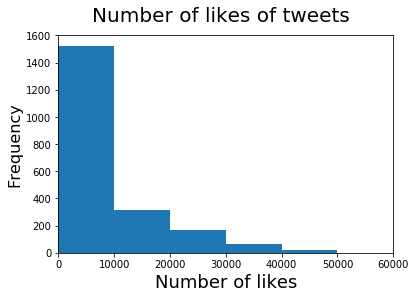

In [112]:
fig = plt.figure()
bins = np.arange(0, 60000, 10000)
plt.hist(data=master_df, x='favorites', bins=bins)
plt.xlim((0,60000));
fig.suptitle('Number of likes of tweets', fontsize=20)
plt.xlabel('Number of likes', fontsize=18)
plt.ylabel('Frequency', fontsize=16);